In [5]:
# Importing BeautifulSoup class from the bs4 module
from bs4 import BeautifulSoup
from os.path import isfile, join
import os
from pathlib import Path

from nltk.tokenize import word_tokenize
import pandas as pd
from html.parser import HTMLParser
import urllib
from urllib.request import urlopen

import pandas as pd

#Find directory and url
dir = str(Path.cwd()) + '/job_postings'  
html_address ='file://' + str(Path.cwd()) + '/job_postings' 

#List all files under job postings folder
onlyfiles = [f for f in os.listdir(dir) if os.path.isfile(join(dir, f))]

# Read All Resumes' Content and Store It In a DataFrame

In [6]:
#Create a new DataFrame and/or clear Dataframe and content each time you run this code
df = pd.DataFrame()
df['JobTitle'] = ''
df['JobTitleShort'] = ''
df['JobDescription'] = ''
df['Url'] = ''
#JobDescription_String = ''

counter = 0
li_counter = 0 # Counts List Items

for url in onlyfiles:
    html_read = urllib.request.urlopen(html_address +'/'+ url).read()

    # Creating a BeautifulSoup object and specifying the parser
    Parse = BeautifulSoup(html_read, 'lxml')

    df.loc[len(df.index), 'Url'] = url
    
    job_title = str(Parse.title.text)
    df.loc[len(df.index)-1,'JobTitle'] = job_title
    
    job_title_short = str(Parse.title.text).split('-')
    df.loc[len(df.index)-1,'JobTitleShort'] = job_title_short[0]
    
    # Skills and Qualifications are always listed as bullet points
    JobDescription_String = ''
    for tag in Parse.find_all('li'):
        #print(f'{tag.name}: {tag.text}')
        JobDescription_String += str(tag.text) + '.'
        li_counter += 1
    
    #If there is no bullet points then try to get other text
    if li_counter > 1:
        df.loc[len(df.index)-1,'JobDescription'] = JobDescription_String   
    else:
        for counter_div, tag in enumerate(Parse.find_all('div')):
            JobDescription_String += str(tag.text) + '.'
            li_counter += 1
        df.loc[len(df.index)-1,'JobDescription'] = JobDescription_String
        
    if li_counter == 0: 
        for tag in Parse.find_all('p'):
            #print(f'{tag.name}: {tag.text}')
            JobDescription_String += str(tag.text) + '.'
            li_counter += 1
        df.loc[len(df.index)-1,'JobDescription'] = JobDescription_String
      
    if li_counter == 0: 
        for tag in Parse.find_all('body'):
            #print(f'{tag.name}: {tag.text}')
            JobDescription_String += str(tag.text) + '.'
            li_counter += 1
        df.loc[len(df.index)-1,'JobDescription'] = JobDescription_String
    
    #Reset list counter
    li_counter = 0
    
    #Count the number of resumes read
    counter +=1

print(counter),print(li_counter)

1458
0


(None, None)

In [7]:
df.head(20)

,JobTitle,JobTitleShort,JobDescription,Url
0,"Computational Biologist - Portland, OR",Computational Biologist,Bachelor’s Degree with major courses in field ...,f96b5907888ed2fd.html
1,"Data Scientist - Austin, TX",Data Scientist,Proven experience of 8+ years as a Machine Lea...,98545ca0ce17b6ab.html
2,"Data Science Intern - New York, NY",Data Science Intern,Be a part of the data science team to produce ...,188be042a58efa2c.html
3,ML/Data Science Intern (Summer 2020) - San Fra...,ML/Data Science Intern (Summer 2020),Achieving data science and software engineerin...,9042480af958a610.html
4,"Data Scientist Intern, PhD, 2020 - Los Angeles...","Data Scientist Intern, PhD, 2020",Updated resume - please include the relevant g...,f27521da38c0e2c2.html
5,"Data Scientist I - Bend, OR 97701",Data Scientist I,\nExecute discovery processes of low to averag...,9d30ea1776ad783d.html
6,2020- Luis J. Alvarez and Admiral Grace M. Hop...,2020,\nDevelop scientific applications and software...,150653d428f2acf0.html
7,"Principal Data Scientist - White Plains, NY",Principal Data Scientist,A track record of creatively tackling challeng...,dd5dabecd250fd8a.html
8,"Quality Data Scientist, Analytics - San Franci...","Quality Data Scientist, Analytics",Link separate data sources into usable formats...,30af8c722a93ceaf.html
9,Novice Intelligence Analyst* - Charlottesville...,Novice Intelligence Analyst*,This position requires individuals to be gover...,e240cfa9d039bf89.html


In [8]:
#Check if you miss to retrieve any relevant data
df[(df['JobDescription'] == '') & (df['JobTitleShort'].str.contains('Data',case =False, na = False)) ]

,JobTitle,JobTitleShort,JobDescription,Url


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   JobTitle        1458 non-null   object
 1   JobTitleShort   1458 non-null   object
 2   JobDescription  1458 non-null   object
 3   Url             1458 non-null   object
dtypes: object(4)
memory usage: 89.2+ KB


# Filter Relevant Resumes

In [10]:
#Filter out unrelated Data Scientist and Data Engineer roles
filter = df['JobTitleShort'].str.contains('Data',case =False, na = False)
df_datascience = df[filter]

In [11]:
df_datascience.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 1 to 1453
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   JobTitle        701 non-null    object
 1   JobTitleShort   701 non-null    object
 2   JobDescription  701 non-null    object
 3   Url             701 non-null    object
dtypes: object(4)
memory usage: 27.4+ KB


# My Resume

In [12]:
myresume = ''

with open('resume.txt') as r:
    for line in r:
        #print(line.strip())
        myresume += str(line.strip()) + '@'

#Preprocessing
# loop for all characters
for character in myresume:
    if character.isdigit():
        myresume = myresume.replace(character, '')
    if character == '.':
        myresume = myresume.replace(character, '')
        
for character in myresume:
    if character == '@':
        myresume = myresume.replace(character, '.')

In [13]:
df_myresume = pd.DataFrame()

df_myresume.loc[0, 'JobTitle']= 'My Resume - Data Scientist' 
df_myresume.loc[0, 'JobTitleShort'] = 'Data Scientist'
df_myresume.loc[0, 'JobDescription'] = myresume
df_myresume.loc[0, 'Url'] = ''

In [14]:
df_myresume['JobDescription'] = df_myresume['JobDescription'].str.replace('Experience.. ','')
df_myresume['JobDescription'] = df_myresume['JobDescription'].str.replace('Additional Skills.. ','')

/var/folders/34/dtw5gsfs11b7xgjr65xkbrw80000gn/T/ipykernel_2956/2783833451.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_myresume['JobDescription'] = df_myresume['JobDescription'].str.replace('Experience.. ','')
/var/folders/34/dtw5gsfs11b7xgjr65xkbrw80000gn/T/ipykernel_2956/2783833451.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_myresume['JobDescription'] = df_myresume['JobDescription'].str.replace('Additional Skills.. ','')


In [15]:
#Append My Resume to DataScientist DataFrame
df_datascience = df_datascience.append(df_myresume,ignore_index=True)

/var/folders/34/dtw5gsfs11b7xgjr65xkbrw80000gn/T/ipykernel_2956/2454391176.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_datascience = df_datascience.append(df_myresume,ignore_index=True)


In [16]:
#Unsupervised Topic Modeling

In [18]:
docs = df_datascience.JobDescription.tolist()
docs[0]

'Proven experience of 8+ years as a Machine Learning Engineer or similar role.Understanding of data structures,data modeling and software architecture.Deep knowledge of math, probability, statistics and algorithms.Ability to write robust code in Java or python.Familiarity with machine learning frameworks (like TensorFlow or PyTorch) and libraries (like scikit-learn).Strong knowledge on big data technologies like Spark, HBase, Kinesis, Redshift, Snowflake, etc.Excellent communication skills.Ability to work in a team.Outstanding analytical and problem-solving skills.Experience in e-learning would be a plus.'

In [20]:
from top2vec import Top2Vec

In [21]:
model = Top2Vec(docs)

2023-04-02 10:19:01,451 - top2vec - INFO - Pre-processing documents for training
2023-04-02 10:19:01,868 - top2vec - INFO - Creating joint document/word embedding
2023-04-02 10:19:06,013 - top2vec - INFO - Creating lower dimension embedding of documents
2023-04-02 10:19:09,906 - top2vec - INFO - Finding dense areas of documents
2023-04-02 10:19:09,923 - top2vec - INFO - Finding topics


In [23]:
topic_sizes,topic_nums = model.get_topic_sizes()
print(topic_sizes)

[303 228 171]


In [24]:
print(topic_nums)

[0 1 2]


In [25]:
topic_words,word_scores,topic_nums = model.get_topics()

In [72]:
for words,scores,nums in zip(topic_words,word_scores,topic_nums):   
        print(nums)
        print(f'Words: {words}')    

0
Words: ['java' 'spark' 'python' 'keras' 'scala' 'aws' 'svm' 'libraries'
 'tensorflow' 'pytorch' 'ggplot' 'plus' 'learn' 'scikit' 'forest'
 'boosting' 'numpy' 'supervised' 'unsupervised' 'nlp' 'matplotlib' 'like'
 'pandas' 'linux' 'bayesian' 'means' 'programming' 'hive' 'distributed'
 'experience' 'common' 'such' 'computing' 'frameworks' 'big' 'ms'
 'excellent' 'scipy' 'ml' 'neural' 'learning' 'practical' 'clustering'
 'scripting' 'machine' 'azure' 'random' 'solid' 'highly' 'cloud']
1
Words: ['the' 'to' 'at' 'be' 'take' 'work' 'all' 'are' 'on' 'for' 'focused' 'do'
 'this' 'ability' 'opportunity' 'that' 'life' 'of' 'collaborative' 'and'
 'benefits' 'company' 'focus' 'qualifications' 'status' 'help' 'in'
 'relationships' 'an' 'your' 'hours' 'independently' 'people' 'well'
 'both' 'by' 'our' 'out' 'service' 'group' 'team' 'working' 'time' 'full'
 'track' 'travel' 'us' 'communicate' 'have' 'within']
2
Words: ['quantitative' 'math' 'hypothesis' 'cross' 'statistics' 'sql'
 'communicate' 'in

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

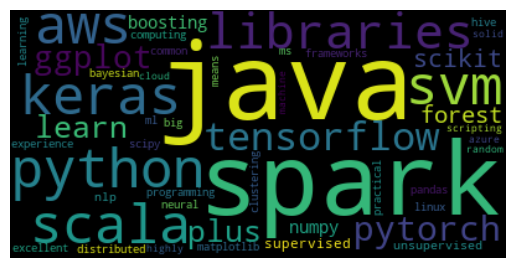

In [77]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS).generate(' '.join(topic_words[0].tolist())) # Use only first cluster
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Extra: Recommend Me Job Positions Similar to My Resume

In [343]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD

In [344]:
vectorizer = TfidfVectorizer(stop_words='english')

tfidf_vector1 = vectorizer.fit_transform(df_datascience['JobDescription'])

In [345]:
#Calculate cosimilarity

similarities = cosine_similarity(tfidf_vector1,tfidf_vector1)
print('pairwise dense output:\n {}\n'.format(similarities))

pairwise dense output:
 [[1.         0.19915624 0.09140741 ... 0.12070119 0.05032085 0.05974387]
 [0.19915624 1.         0.12800297 ... 0.15401723 0.08486332 0.06790959]
 [0.09140741 0.12800297 1.         ... 0.1264466  0.08944114 0.011959  ]
 ...
 [0.12070119 0.15401723 0.1264466  ... 1.         0.13059726 0.05924166]
 [0.05032085 0.08486332 0.08944114 ... 0.13059726 1.         0.01803103]
 [0.05974387 0.06790959 0.011959   ... 0.05924166 0.01803103 1.        ]]



In [349]:
# Generate mapping between titles and index and drop duplicate data
indices = pd.Series(df_datascience.index, index=df_datascience['JobTitle']).drop_duplicates()

def get_recommendations(jobtitle, cosine_sim, indices):
    # Get index of job title that matches title
    idx = indices[jobtitle]
    # Sort the jobs based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar jobs
    sim_scores = sim_scores[1:11]
    # Get the job indices
    job_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar jobs
    return df_datascience['JobTitle'].iloc[job_indices]

In [351]:
# Generate recommendations
print(get_recommendations('My Resume - Data Scientist', similarities, indices))

663           Data Scientist (PhD) - Intern - Spring, TX
170    Data Science Intern (BS / MS) - Intern - Sprin...
539                         Data Scientist - Seattle, WA
109      Associate Data Scientist (BS / MS) - Spring, TX
232                    Data Scientist (PhD) - Spring, TX
33           Physics Data Scientist - Foothill Ranch, CA
310          Physics Data Scientist - Foothill Ranch, CA
427               Data Scientist - Aliso Viejo, CA 92656
677                     Data Scientist - Aliso Viejo, CA
182                  Data Scientist - New York, NY 10011
Name: JobTitle, dtype: object
